# Methods of indication optimal number of clusters: Dendrogram and Elbow Method

In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Wholesale customers data

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.
   - FRESH: annual spending (m.u.) on fresh products (Continuous)
   - MILK: annual spending (m.u.) on milk products (Continuous)
   - GROCERY: annual spending (m.u.) on grocery products (Continuous)
   - FROZEN: annual spending (m.u.) on frozen products (Continuous)
   - DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
   - DELICATESSEN: annual spending (m.u.) on delicatessen products (Continuous)
   - CHANNEL: customer channels - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
   - REGION: customer regions - Lisnon, Oporto or Other (Nominal)

In [2]:
df = pd.read_csv('c:/1/Wholesale customers data.csv')
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


# We make clusters for two variables: 'Fresh', 'Milk'

In [3]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

## Dendrogram method

Dendrograms is used to count number of clusters. Dendrogram works on the distance between point of dataframe.


In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

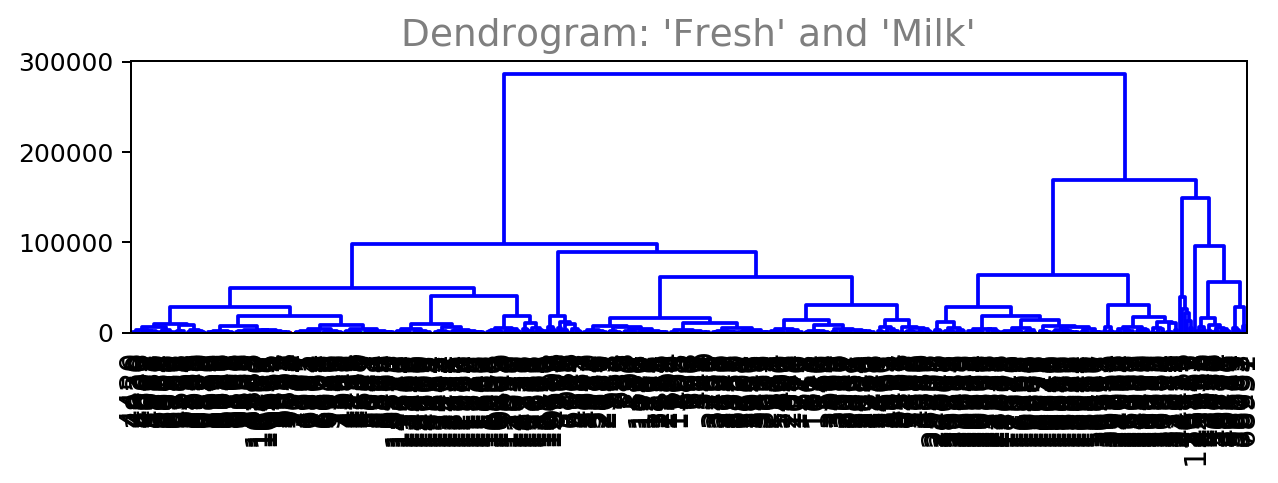

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8,2), dpi= 180)  
plt.title("Dendrogram: 'Fresh' and 'Milk'", fontsize=15, alpha=0.5)  
dend = shc.dendrogram(shc.linkage(df[['Fresh', 'Milk']], method='ward'), labels=df.Fresh.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

We imagine invisible line in the middle of high of the plot. I see four branches which cross with this imagined line.

## Elbow Method

In [6]:
PKS =df[['Fresh', 'Milk']]

##### MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(PKS)
df_transformed = mms.transform(PKS)

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

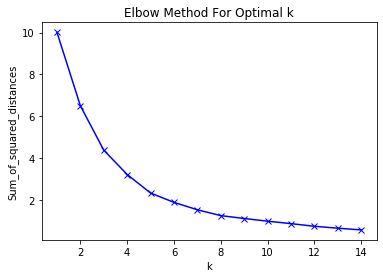

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

To determine the optimal number of clusters, we must select the value of k on the "elbow", ie the point at which the distortion / inertia begins to decrease linearly. Therefore, for the given data, we conclude that the optimal number of clusters for the data is 5.

# Clustering population by BMI and Age

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(PKS)

array([4, 1, 4, 4, 2, 4, 4, 4, 4, 1, 1, 4, 2, 2, 2, 4, 1, 4, 2, 4, 2, 4,
       2, 3, 2, 2, 4, 4, 1, 0, 2, 1, 2, 2, 1, 1, 2, 4, 1, 0, 2, 2, 4, 1,
       4, 1, 1, 3, 4, 1, 4, 1, 0, 1, 2, 4, 1, 1, 4, 4, 4, 3, 4, 1, 4, 1,
       1, 2, 1, 4, 2, 2, 4, 2, 4, 2, 1, 4, 4, 1, 4, 1, 4, 2, 4, 3, 3, 0,
       4, 2, 4, 4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 0, 4, 2, 1, 1, 1, 1,
       4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 1, 4, 4, 0, 0, 2, 2, 1, 0, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 1, 2, 1,
       1, 1, 4, 2, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1,
       0, 4, 4, 1, 4, 0, 1, 3, 1, 4, 1, 1, 4, 1, 2, 4, 4, 1, 4, 2, 2, 1,
       4, 4, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 4,
       4, 4, 4, 1, 4, 4, 2, 4, 1, 4, 4, 1, 2, 1, 4, 1, 4, 2, 4, 0, 2, 2,
       2, 4, 4, 1, 4, 4, 2, 4, 1, 1, 4, 2, 4, 2, 4, 4, 0, 0, 4, 4, 2, 1,
       1, 1, 1, 2, 4, 2, 4, 1, 1, 0, 1, 1, 2, 4, 4, 2, 1, 4, 0, 2, 0, 0,
       4, 4, 2, 0, 1, 4, 1, 1, 2, 4, 2, 4, 4, 1, 2,

Text(0, 0.5, 'Milk')

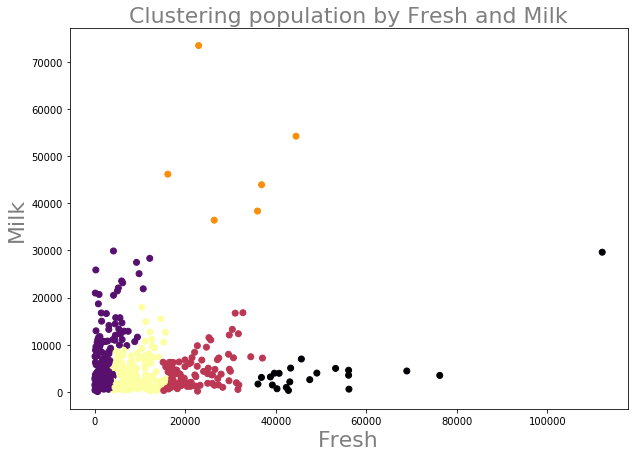

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(PKS['Fresh'], PKS['Milk'], c=cluster.labels_, cmap='inferno')
plt.title('Clustering population by Fresh and Milk', fontsize=22, alpha=0.5)
plt.xlabel('Fresh', fontsize=22, alpha=0.5)
plt.ylabel('Milk', fontsize=22, alpha=0.5)